When you are trying to predict a continuous variable, you can evaluate the performance of your model using the Mean Squared Error because it measures the squared distance from your points to the line, and finds the mean distance (how far the points are from the line of best fit.)

# Intro to Neural Networks
These learning models can be supervised or unsupervised, with a feedback process to self-correct.

### What is a neural network?
A neural network mimics the human brain to understand data patterns. Each node is a perceptron, similar to multiple linear regression. The result from the node feeds an activator, and each layer fine-tunes the output to reduce the error. Deep learning is a neural network with more than three layers.

When a deer jumps in front of my car, first my brain identifies it as a deer, and what is the size of the deer. Then, my brain looks at the speed of my car, and how far away is the deer. Then, my brain tells my leg how much force it needs to apply to the brake pedal in order to slow down in time. My brain also tells my body to brace for a hard impact.

### ReLU and Activation functions

Activation functions allow the algorithm to learn more complex patterns in the data.

Simplest is ReLU:

if input > 0; return input. else return 0.

Forward propagation: takes input values and propagates forward thru hidden layers to the output. Used to calculate predictions and errors.

Backward propagation: go back one layer at a time from output to input to see how small changes impact the difference between the predicted and actual values. Working to minimize the loss function.

In [2]:
import pandas as pd
import torch

diabetes_df = pd.read_csv("diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
from sklearn.model_selection import train_test_split
x = diabetes_df.drop('Outcome', axis=1).values
y = diabetes_df['Outcome'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

In [12]:
import torch.nn as nn
import torch.nn.functional as F #this contains the activation functions

#create tensors from the data
#it is easier to create tensors from numpy arrays

x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

print(x_train)

tensor([[  7.0000, 184.0000,  84.0000,  ...,  35.5000,   0.3550,  41.0000],
        [  6.0000,  85.0000,  78.0000,  ...,  31.2000,   0.3820,  42.0000],
        [  2.0000, 106.0000,  64.0000,  ...,  30.5000,   1.4000,  34.0000],
        ...,
        [  1.0000,  97.0000,  70.0000,  ...,  38.1000,   0.2180,  30.0000],
        [  6.0000, 190.0000,  92.0000,  ...,  35.5000,   0.2780,  66.0000],
        [  4.0000, 144.0000,  58.0000,  ...,  29.5000,   0.2870,  37.0000]])


In [23]:
#artificial neural network
class ANN_Model(nn.Module):
    def __init__(self, input_features=8, hidden1=20, hidden2=20, out_features=2):
        super().__init__() #super is a computed indirect reference
        #it isolates changes and makes sure the children in the layers of multiple inheritance
        #are calling the right parents
        self.layer_1_connection = nn.Linear(input_features, hidden1)
        self.layer_2_connection = nn.Linear(hidden1, hidden2)
        self.out = nn.Linear(hidden2, out_features)

    def forward(self, x):
        x = F.relu(self.layer_1_connection(x))
        x = F.relu(self.layer_2_connection(x))
        x = self.out(x)
        return x

In [24]:
torch.manual_seed(42)

#create instance of the model
ann = ANN_Model()

In [25]:
# loss function
loss_function = nn.CrossEntropyLoss()

#optimizer
optimizer = torch.optim.Adam(ann.parameters(), lr = 0.01)

In [26]:
#run model thru various iterations/epochs
final_loss = []
n_epochs = 500
for epoch in range(n_epochs):
    y_pred = ann.forward(x_train)
    loss = loss_function(y_pred, y_train)
    final_loss.append(loss)

    if epoch % 10 == 1:
        print(f'Epoch number: {epoch} with loss {loss}')
    
    optimizer.zero_grad() #zeros the gradient before running backward propagation
    loss.backward() #minimize the loss function using backward propagation
    optimizer.step() #perform one optimization step each function
    

Epoch number: 1 with loss 0.7325447797775269
Epoch number: 11 with loss 0.6600156426429749
Epoch number: 21 with loss 0.6357854604721069
Epoch number: 31 with loss 0.6232737302780151
Epoch number: 41 with loss 0.6109457612037659
Epoch number: 51 with loss 0.5912511348724365
Epoch number: 61 with loss 0.5709356665611267
Epoch number: 71 with loss 0.549248218536377
Epoch number: 81 with loss 0.5332964658737183
Epoch number: 91 with loss 0.5167083740234375
Epoch number: 101 with loss 0.5048837661743164
Epoch number: 111 with loss 0.4881722629070282
Epoch number: 121 with loss 0.4804435670375824
Epoch number: 131 with loss 0.4685402512550354
Epoch number: 141 with loss 0.4585517942905426
Epoch number: 151 with loss 0.4493770897388458
Epoch number: 161 with loss 0.4355601966381073
Epoch number: 171 with loss 0.4265795946121216
Epoch number: 181 with loss 0.41821667551994324
Epoch number: 191 with loss 0.41820430755615234
Epoch number: 201 with loss 0.4039551019668579
Epoch number: 211 with 

In [27]:
y_pred = []

with torch.no_grad(): #this will decrease memory consumption
    for i, data in enumerate(x_test):
        prediction = ann(data)
        y_pred.append(prediction.argmax())
        #returns the index with the max element in each position set
        

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (233).

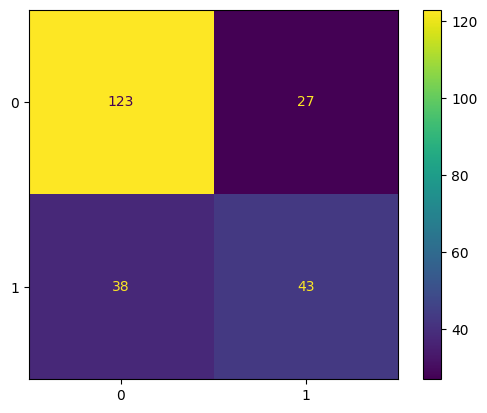

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)